# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
%autosave 0
from helpers import utils

# TATSSI Time Series Generator
from TATSSI.time_series.generator import Generator
# TATSSI Time Series Analysis and QA Analytics
from TATSSI.notebooks.helpers.qa_analytics import Analytics
from TATSSI.notebooks.helpers.time_series_interpolation import TimeSeriesInterpolation

Autosave disabled


## Generate time series for MODIS data aquired previously

In the TATSSI Downloaders demonstrator we downloaded some MODIS data, the [MOD13A2.006](https://lpdaac.usgs.gov/products/mod13a2v006/) product for 2017. This product contains several layers including the EVI and NDVI, at 1km every 16 days, as well as associated Quality Assessment flags.

TATSSI can create a time series for this dataset. The default behavior is:

1. For every file in the data directory that matches the product:
  - Will import each band or subdataset to the internal TATSSI format - Cloud Optimized GeoTiff [(COG)](https://www.cogeo.org/)


2. For each QA layer associated to the product:
  - Wil import it to the internal TATSSI format and perform the QA decoding
  
3. For each band or subdataset and associated QA layers
  - Will create [GDAL VRTs](https://www.gdal.org/gdal_vrttut.html) layer stacks

to loop evert each file and each band or subdatasets and create the corresponding time series. The required parameters are the location of the data and the product.

In [2]:
# Set data directory
DataDir = '../../data/MOD13A2.006'
# Set product, it must match product name in TATSSI catalogue
product, version = 'MOD13A2', '006'

Using these setings now we can generate the time series:

In [3]:
# Create the time series generator object
tsg = Generator(source_dir = DataDir, product=product,
                version=version, data_format='hdf')

In [4]:
# Generate time series -- only if it hasn't been created previosly
#tsg.generate_time_series()

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000049.h09v07.006.2015136104431.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2000049.h09v07.006.2015136104431.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000049.h09v07.006.2015136104431.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2000049.h09v07.006.2015136104431.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000049.h09v07.006.2015136104431.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000065.h09v07.006.2015136021818.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2000065.h09v07.006.2015136021818.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000065.h09v07.006.2015136021818.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2000065.h09v07.006.2015136021818.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000065.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000097.h09v07.006.2015136040542.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2000097.h09v07.006.2015136040542.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000097.h09v07.006.2015136040542.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2000097.h09v07.006.2015136040542.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000097.h09v07.006.2015136040542.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000129.h09v07.006.2015137050815.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2000129.h09v07.006.2015137050815.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000129.h09v07.006.2015137050815.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2000129.h09v07.006.2015137050815.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000129.h09v07.006.2015137050815.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000145.h09v07.006.2015137094150.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2000145.h09v07.006.2015137094150.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000145.h09v07.006.2015137094150.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2000145.h09v07.006.2015137094150.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000145.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000177.h09v07.006.2015138071406.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2000177.h09v07.006.2015138071406.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000177.h09v07.006.2015138071406.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2000177.h09v07.006.2015138071406.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000177.h09v07.006.2015138071406.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000209.h09v07.006.2015138075055.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2000209.h09v07.006.2015138075055.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000209.h09v07.006.2015138075055.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2000209.h09v07.006.2015138075055.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000209.h09v07.006.2015138075055.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000225.h09v07.006.2015138071936.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2000225.h09v07.006.2015138071936.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000225.h09v07.006.2015138071936.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2000225.h09v07.006.2015138071936.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000225.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000257.h09v07.006.2015139073238.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2000257.h09v07.006.2015139073238.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000257.h09v07.006.2015139073238.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2000257.h09v07.006.2015139073238.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000257.h09v07.006.2015139073238.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000289.h09v07.006.2015139084240.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2000289.h09v07.006.2015139084240.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000289.h09v07.006.2015139084240.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2000289.h09v07.006.2015139084240.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000289.h09v07.006.2015139084240.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000305.h09v07.006.2015139073838.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2000305.h09v07.006.2015139073838.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000305.h09v07.006.2015139073838.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2000305.h09v07.006.2015139073838.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000305.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000337.h09v07.006.2015140091551.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2000337.h09v07.006.2015140091551.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000337.h09v07.006.2015140091551.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2000337.h09v07.006.2015140091551.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2000337.h09v07.006.2015140091551.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001001.h09v07.006.2015140082847.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2001001.h09v07.006.2015140082847.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001001.h09v07.006.2015140082847.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2001001.h09v07.006.2015140082847.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001001.h09v07.006.2015140082847.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001017.h09v07.006.2015140091052.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2001017.h09v07.006.2015140091052.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001017.h09v07.006.2015140091052.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2001017.h09v07.006.2015140091052.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001017.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001049.h09v07.006.2015142165727.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2001049.h09v07.006.2015142165727.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001049.h09v07.006.2015142165727.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2001049.h09v07.006.2015142165727.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001049.h09v07.006.2015142165727.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001081.h09v07.006.2015142184350.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2001081.h09v07.006.2015142184350.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001081.h09v07.006.2015142184350.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2001081.h09v07.006.2015142184350.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001081.h09v07.006.2015142184350.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001097.h09v07.006.2015142193119.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2001097.h09v07.006.2015142193119.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001097.h09v07.006.2015142193119.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2001097.h09v07.006.2015142193119.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001097.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001129.h09v07.006.2015142064457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2001129.h09v07.006.2015142064457.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001129.h09v07.006.2015142064457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2001129.h09v07.006.2015142064457.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001129.h09v07.006.2015142064457.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001161.h09v07.006.2015143070626.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2001161.h09v07.006.2015143070626.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001161.h09v07.006.2015143070626.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2001161.h09v07.006.2015143070626.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001161.h09v07.006.2015143070626.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001177.h09v07.006.2015143095005.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2001177.h09v07.006.2015143095005.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001177.h09v07.006.2015143095005.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2001177.h09v07.006.2015143095005.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001177.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001209.h09v07.006.2015143163834.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2001209.h09v07.006.2015143163834.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001209.h09v07.006.2015143163834.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2001209.h09v07.006.2015143163834.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001209.h09v07.006.2015143163834.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001241.h09v07.006.2015144060024.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2001241.h09v07.006.2015144060024.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001241.h09v07.006.2015144060024.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2001241.h09v07.006.2015144060024.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001241.h09v07.006.2015144060024.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001257.h09v07.006.2015144060246.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2001257.h09v07.006.2015144060246.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001257.h09v07.006.2015144060246.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2001257.h09v07.006.2015144060246.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001257.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001289.h09v07.006.2015146013926.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2001289.h09v07.006.2015146013926.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001289.h09v07.006.2015146013926.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2001289.h09v07.006.2015146013926.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001289.h09v07.006.2015146013926.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001321.h09v07.006.2015146031302.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2001321.h09v07.006.2015146031302.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001321.h09v07.006.2015146031302.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2001321.h09v07.006.2015146031302.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001321.h09v07.006.2015146031302.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001337.h09v07.006.2015146035831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2001337.h09v07.006.2015146035831.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001337.h09v07.006.2015146035831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2001337.h09v07.006.2015146035831.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2001337.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002001.h09v07.006.2015146145327.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2002001.h09v07.006.2015146145327.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002001.h09v07.006.2015146145327.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2002001.h09v07.006.2015146145327.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002001.h09v07.006.2015146145327.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002033.h09v07.006.2015146145352.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2002033.h09v07.006.2015146145352.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002033.h09v07.006.2015146145352.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2002033.h09v07.006.2015146145352.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002033.h09v07.006.2015146145352.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002049.h09v07.006.2015146124652.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2002049.h09v07.006.2015146124652.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002049.h09v07.006.2015146124652.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2002049.h09v07.006.2015146124652.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002049.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002081.h09v07.006.2015147123547.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2002081.h09v07.006.2015147123547.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002081.h09v07.006.2015147123547.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2002081.h09v07.006.2015147123547.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002081.h09v07.006.2015147123547.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002113.h09v07.006.2015147211628.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2002113.h09v07.006.2015147211628.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002113.h09v07.006.2015147211628.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2002113.h09v07.006.2015147211628.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002113.h09v07.006.2015147211628.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002129.h09v07.006.2015147232323.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2002129.h09v07.006.2015147232323.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002129.h09v07.006.2015147232323.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2002129.h09v07.006.2015147232323.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002129.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002161.h09v07.006.2015148091817.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2002161.h09v07.006.2015148091817.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002161.h09v07.006.2015148091817.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2002161.h09v07.006.2015148091817.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002161.h09v07.006.2015148091817.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002193.h09v07.006.2015149024729.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2002193.h09v07.006.2015149024729.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002193.h09v07.006.2015149024729.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2002193.h09v07.006.2015149024729.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002193.h09v07.006.2015149024729.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002209.h09v07.006.2015149180533.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2002209.h09v07.006.2015149180533.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002209.h09v07.006.2015149180533.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2002209.h09v07.006.2015149180533.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002209.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002241.h09v07.006.2015150202629.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2002241.h09v07.006.2015150202629.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002241.h09v07.006.2015150202629.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2002241.h09v07.006.2015150202629.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002241.h09v07.006.2015150202629.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002273.h09v07.006.2015151072944.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2002273.h09v07.006.2015151072944.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002273.h09v07.006.2015151072944.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2002273.h09v07.006.2015151072944.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002273.h09v07.006.2015151072944.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002289.h09v07.006.2015152035413.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2002289.h09v07.006.2015152035413.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002289.h09v07.006.2015152035413.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2002289.h09v07.006.2015152035413.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002289.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002321.h09v07.006.2015152182658.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2002321.h09v07.006.2015152182658.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002321.h09v07.006.2015152182658.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2002321.h09v07.006.2015152182658.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002321.h09v07.006.2015152182658.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002353.h09v07.006.2018226091710.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2002353.h09v07.006.2018226091710.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002353.h09v07.006.2018226091710.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2002353.h09v07.006.2018226091710.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2002353.h09v07.006.2018226091710.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003001.h09v07.006.2015153071820.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2003001.h09v07.006.2015153071820.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003001.h09v07.006.2015153071820.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2003001.h09v07.006.2015153071820.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003001.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003033.h09v07.006.2015156052449.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2003033.h09v07.006.2015156052449.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003033.h09v07.006.2015156052449.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2003033.h09v07.006.2015156052449.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003033.h09v07.006.2015156052449.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003065.h09v07.006.2015156190513.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2003065.h09v07.006.2015156190513.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003065.h09v07.006.2015156190513.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2003065.h09v07.006.2015156190513.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003065.h09v07.006.2015156190513.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003081.h09v07.006.2015156190546.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2003081.h09v07.006.2015156190546.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003081.h09v07.006.2015156190546.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2003081.h09v07.006.2015156190546.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003081.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003113.h09v07.006.2015158152110.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2003113.h09v07.006.2015158152110.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003113.h09v07.006.2015158152110.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2003113.h09v07.006.2015158152110.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003113.h09v07.006.2015158152110.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003145.h09v07.006.2015158154314.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2003145.h09v07.006.2015158154314.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003145.h09v07.006.2015158154314.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2003145.h09v07.006.2015158154314.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003145.h09v07.006.2015158154314.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003161.h09v07.006.2015159142245.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2003161.h09v07.006.2015159142245.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003161.h09v07.006.2015159142245.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2003161.h09v07.006.2015159142245.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003161.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003193.h09v07.006.2015153105750.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2003193.h09v07.006.2015153105750.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003193.h09v07.006.2015153105750.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2003193.h09v07.006.2015153105750.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003193.h09v07.006.2015153105750.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003225.h09v07.006.2015153113811.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2003225.h09v07.006.2015153113811.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003225.h09v07.006.2015153113811.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2003225.h09v07.006.2015153113811.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003225.h09v07.006.2015153113811.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003241.h09v07.006.2015153113721.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2003241.h09v07.006.2015153113721.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003241.h09v07.006.2015153113721.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2003241.h09v07.006.2015153113721.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003241.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003273.h09v07.006.2015153115140.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2003273.h09v07.006.2015153115140.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003273.h09v07.006.2015153115140.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2003273.h09v07.006.2015153115140.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003273.h09v07.006.2015153115140.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003305.h09v07.006.2015153124718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2003305.h09v07.006.2015153124718.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003305.h09v07.006.2015153124718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2003305.h09v07.006.2015153124718.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003305.h09v07.006.2015153124718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003321.h09v07.006.2015153125902.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2003321.h09v07.006.2015153125902.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003321.h09v07.006.2015153125902.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2003321.h09v07.006.2015153125902.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003321.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003353.h09v07.006.2018222145831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2003353.h09v07.006.2018222145831.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003353.h09v07.006.2018222145831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2003353.h09v07.006.2018222145831.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2003353.h09v07.006.2018222145831.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004017.h09v07.006.2015154121254.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2004017.h09v07.006.2015154121254.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004017.h09v07.006.2015154121254.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2004017.h09v07.006.2015154121254.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004017.h09v07.006.2015154121254.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004033.h09v07.006.2015154121931.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2004033.h09v07.006.2015154121931.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004033.h09v07.006.2015154121931.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2004033.h09v07.006.2015154121931.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004033.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004065.h09v07.006.2015154124745.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2004065.h09v07.006.2015154124745.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004065.h09v07.006.2015154124745.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2004065.h09v07.006.2015154124745.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004065.h09v07.006.2015154124745.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004097.h09v07.006.2015154124437.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2004097.h09v07.006.2015154124437.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004097.h09v07.006.2015154124437.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2004097.h09v07.006.2015154124437.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004097.h09v07.006.2015154124437.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004113.h09v07.006.2015154125140.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2004113.h09v07.006.2015154125140.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004113.h09v07.006.2015154125140.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2004113.h09v07.006.2015154125140.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004113.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004145.h09v07.006.2015154130038.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2004145.h09v07.006.2015154130038.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004145.h09v07.006.2015154130038.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2004145.h09v07.006.2015154130038.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004145.h09v07.006.2015154130038.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004177.h09v07.006.2015154131125.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2004177.h09v07.006.2015154131125.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004177.h09v07.006.2015154131125.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2004177.h09v07.006.2015154131125.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004177.h09v07.006.2015154131125.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004193.h09v07.006.2015154131718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2004193.h09v07.006.2015154131718.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004193.h09v07.006.2015154131718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2004193.h09v07.006.2015154131718.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004193.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004225.h09v07.006.2015154133127.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2004225.h09v07.006.2015154133127.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004225.h09v07.006.2015154133127.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2004225.h09v07.006.2015154133127.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004225.h09v07.006.2015154133127.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004257.h09v07.006.2015154133403.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2004257.h09v07.006.2015154133403.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004257.h09v07.006.2015154133403.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2004257.h09v07.006.2015154133403.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004257.h09v07.006.2015154133403.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004273.h09v07.006.2015154135145.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2004273.h09v07.006.2015154135145.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004273.h09v07.006.2015154135145.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2004273.h09v07.006.2015154135145.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004273.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004305.h09v07.006.2015154140226.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2004305.h09v07.006.2015154140226.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004305.h09v07.006.2015154140226.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2004305.h09v07.006.2015154140226.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004305.h09v07.006.2015154140226.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004337.h09v07.006.2015154141022.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2004337.h09v07.006.2015154141022.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004337.h09v07.006.2015154141022.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2004337.h09v07.006.2015154141022.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004337.h09v07.006.2015154141022.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004353.h09v07.006.2018226091225.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2004353.h09v07.006.2018226091225.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004353.h09v07.006.2018226091225.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2004353.h09v07.006.2018226091225.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2004353.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005017.h09v07.006.2015157042651.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2005017.h09v07.006.2015157042651.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005017.h09v07.006.2015157042651.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2005017.h09v07.006.2015157042651.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005017.h09v07.006.2015157042651.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005049.h09v07.006.2015157043615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2005049.h09v07.006.2015157043615.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005049.h09v07.006.2015157043615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2005049.h09v07.006.2015157043615.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005049.h09v07.006.2015157043615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005065.h09v07.006.2015157043615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2005065.h09v07.006.2015157043615.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005065.h09v07.006.2015157043615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2005065.h09v07.006.2015157043615.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005065.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005097.h09v07.006.2015157044139.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2005097.h09v07.006.2015157044139.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005097.h09v07.006.2015157044139.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2005097.h09v07.006.2015157044139.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005097.h09v07.006.2015157044139.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005129.h09v07.006.2015157050756.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2005129.h09v07.006.2015157050756.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005129.h09v07.006.2015157050756.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2005129.h09v07.006.2015157050756.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005129.h09v07.006.2015157050756.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005145.h09v07.006.2015157051600.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2005145.h09v07.006.2015157051600.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005145.h09v07.006.2015157051600.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2005145.h09v07.006.2015157051600.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005145.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005177.h09v07.006.2015157054532.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2005177.h09v07.006.2015157054532.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005177.h09v07.006.2015157054532.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2005177.h09v07.006.2015157054532.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005177.h09v07.006.2015157054532.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005209.h09v07.006.2015157055054.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2005209.h09v07.006.2015157055054.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005209.h09v07.006.2015157055054.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2005209.h09v07.006.2015157055054.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005209.h09v07.006.2015157055054.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005225.h09v07.006.2015157054843.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2005225.h09v07.006.2015157054843.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005225.h09v07.006.2015157054843.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2005225.h09v07.006.2015157054843.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005225.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005257.h09v07.006.2015157055347.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2005257.h09v07.006.2015157055347.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005257.h09v07.006.2015157055347.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2005257.h09v07.006.2015157055347.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005257.h09v07.006.2015157055347.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005289.h09v07.006.2015157061147.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2005289.h09v07.006.2015157061147.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005289.h09v07.006.2015157061147.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2005289.h09v07.006.2015157061147.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005289.h09v07.006.2015157061147.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005305.h09v07.006.2015157060709.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2005305.h09v07.006.2015157060709.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005305.h09v07.006.2015157060709.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2005305.h09v07.006.2015157060709.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005305.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005337.h09v07.006.2015157061828.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2005337.h09v07.006.2015157061828.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005337.h09v07.006.2015157061828.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2005337.h09v07.006.2015157061828.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2005337.h09v07.006.2015157061828.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006001.h09v07.006.2015161092436.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2006001.h09v07.006.2015161092436.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006001.h09v07.006.2015161092436.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2006001.h09v07.006.2015161092436.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006001.h09v07.006.2015161092436.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006017.h09v07.006.2015161112912.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2006017.h09v07.006.2015161112912.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006017.h09v07.006.2015161112912.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2006017.h09v07.006.2015161112912.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006017.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006049.h09v07.006.2015161112909.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2006049.h09v07.006.2015161112909.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006049.h09v07.006.2015161112909.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2006049.h09v07.006.2015161112909.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006049.h09v07.006.2015161112909.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006081.h09v07.006.2015161121441.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2006081.h09v07.006.2015161121441.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006081.h09v07.006.2015161121441.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2006081.h09v07.006.2015161121441.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006081.h09v07.006.2015161121441.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006097.h09v07.006.2015161151544.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2006097.h09v07.006.2015161151544.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006097.h09v07.006.2015161151544.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2006097.h09v07.006.2015161151544.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006097.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006129.h09v07.006.2015161161014.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2006129.h09v07.006.2015161161014.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006129.h09v07.006.2015161161014.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2006129.h09v07.006.2015161161014.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006129.h09v07.006.2015161161014.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006161.h09v07.006.2015161172844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2006161.h09v07.006.2015161172844.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006161.h09v07.006.2015161172844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2006161.h09v07.006.2015161172844.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006161.h09v07.006.2015161172844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006177.h09v07.006.2015161173253.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2006177.h09v07.006.2015161173253.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006177.h09v07.006.2015161173253.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2006177.h09v07.006.2015161173253.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006177.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006209.h09v07.006.2015161191909.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2006209.h09v07.006.2015161191909.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006209.h09v07.006.2015161191909.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2006209.h09v07.006.2015161191909.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006209.h09v07.006.2015161191909.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006241.h09v07.006.2015161195511.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2006241.h09v07.006.2015161195511.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006241.h09v07.006.2015161195511.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2006241.h09v07.006.2015161195511.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006241.h09v07.006.2015161195511.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006257.h09v07.006.2015161200930.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2006257.h09v07.006.2015161200930.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006257.h09v07.006.2015161200930.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2006257.h09v07.006.2015161200930.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006257.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006289.h09v07.006.2015161204929.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2006289.h09v07.006.2015161204929.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006289.h09v07.006.2015161204929.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2006289.h09v07.006.2015161204929.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006289.h09v07.006.2015161204929.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006321.h09v07.006.2015161212611.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2006321.h09v07.006.2015161212611.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006321.h09v07.006.2015161212611.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2006321.h09v07.006.2015161212611.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006321.h09v07.006.2015161212611.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006337.h09v07.006.2015161214029.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2006337.h09v07.006.2015161214029.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006337.h09v07.006.2015161214029.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2006337.h09v07.006.2015161214029.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2006337.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007001.h09v07.006.2015160165329.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2007001.h09v07.006.2015160165329.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007001.h09v07.006.2015160165329.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2007001.h09v07.006.2015160165329.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007001.h09v07.006.2015160165329.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007033.h09v07.006.2015161220110.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2007033.h09v07.006.2015161220110.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007033.h09v07.006.2015161220110.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2007033.h09v07.006.2015161220110.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007033.h09v07.006.2015161220110.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007049.h09v07.006.2015161222340.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2007049.h09v07.006.2015161222340.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007049.h09v07.006.2015161222340.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2007049.h09v07.006.2015161222340.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007049.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007081.h09v07.006.2015161225938.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2007081.h09v07.006.2015161225938.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007081.h09v07.006.2015161225938.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2007081.h09v07.006.2015161225938.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007081.h09v07.006.2015161225938.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007113.h09v07.006.2015161232816.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2007113.h09v07.006.2015161232816.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007113.h09v07.006.2015161232816.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2007113.h09v07.006.2015161232816.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007113.h09v07.006.2015161232816.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007129.h09v07.006.2015161233522.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2007129.h09v07.006.2015161233522.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007129.h09v07.006.2015161233522.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2007129.h09v07.006.2015161233522.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007129.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007161.h09v07.006.2015162000720.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2007161.h09v07.006.2015162000720.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007161.h09v07.006.2015162000720.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2007161.h09v07.006.2015162000720.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007161.h09v07.006.2015162000720.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007193.h09v07.006.2015162003438.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2007193.h09v07.006.2015162003438.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007193.h09v07.006.2015162003438.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2007193.h09v07.006.2015162003438.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007193.h09v07.006.2015162003438.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007209.h09v07.006.2015164011326.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2007209.h09v07.006.2015164011326.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007209.h09v07.006.2015164011326.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2007209.h09v07.006.2015164011326.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007209.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007241.h09v07.006.2015164182357.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2007241.h09v07.006.2015164182357.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007241.h09v07.006.2015164182357.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2007241.h09v07.006.2015164182357.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007241.h09v07.006.2015164182357.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007273.h09v07.006.2015167050012.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2007273.h09v07.006.2015167050012.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007273.h09v07.006.2015167050012.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2007273.h09v07.006.2015167050012.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007273.h09v07.006.2015167050012.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007289.h09v07.006.2015167192016.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2007289.h09v07.006.2015167192016.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007289.h09v07.006.2015167192016.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2007289.h09v07.006.2015167192016.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007289.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007321.h09v07.006.2015168093452.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2007321.h09v07.006.2015168093452.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007321.h09v07.006.2015168093452.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2007321.h09v07.006.2015168093452.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007321.h09v07.006.2015168093452.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007353.h09v07.006.2018222150139.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2007353.h09v07.006.2018222150139.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007353.h09v07.006.2018222150139.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2007353.h09v07.006.2018222150139.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2007353.h09v07.006.2018222150139.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008001.h09v07.006.2015169100844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2008001.h09v07.006.2015169100844.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008001.h09v07.006.2015169100844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2008001.h09v07.006.2015169100844.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008001.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008033.h09v07.006.2015170042518.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2008033.h09v07.006.2015170042518.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008033.h09v07.006.2015170042518.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2008033.h09v07.006.2015170042518.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008033.h09v07.006.2015170042518.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008065.h09v07.006.2015172175156.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2008065.h09v07.006.2015172175156.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008065.h09v07.006.2015172175156.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2008065.h09v07.006.2015172175156.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008065.h09v07.006.2015172175156.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008081.h09v07.006.2015173010654.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2008081.h09v07.006.2015173010654.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008081.h09v07.006.2015173010654.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2008081.h09v07.006.2015173010654.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008081.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008113.h09v07.006.2015173161427.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2008113.h09v07.006.2015173161427.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008113.h09v07.006.2015173161427.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2008113.h09v07.006.2015173161427.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008113.h09v07.006.2015173161427.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008145.h09v07.006.2015175104410.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2008145.h09v07.006.2015175104410.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008145.h09v07.006.2015175104410.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2008145.h09v07.006.2015175104410.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008145.h09v07.006.2015175104410.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008161.h09v07.006.2015176065029.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2008161.h09v07.006.2015176065029.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008161.h09v07.006.2015176065029.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2008161.h09v07.006.2015176065029.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008161.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008193.h09v07.006.2015177041848.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2008193.h09v07.006.2015177041848.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008193.h09v07.006.2015177041848.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2008193.h09v07.006.2015177041848.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008193.h09v07.006.2015177041848.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008225.h09v07.006.2015178163419.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2008225.h09v07.006.2015178163419.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008225.h09v07.006.2015178163419.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2008225.h09v07.006.2015178163419.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008225.h09v07.006.2015178163419.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008241.h09v07.006.2015179215505.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2008241.h09v07.006.2015179215505.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008241.h09v07.006.2015179215505.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2008241.h09v07.006.2015179215505.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008241.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008273.h09v07.006.2015180220851.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2008273.h09v07.006.2015180220851.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008273.h09v07.006.2015180220851.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2008273.h09v07.006.2015180220851.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008273.h09v07.006.2015180220851.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008305.h09v07.006.2015181141458.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2008305.h09v07.006.2015181141458.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008305.h09v07.006.2015181141458.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2008305.h09v07.006.2015181141458.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008305.h09v07.006.2015181141458.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008321.h09v07.006.2015181142201.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2008321.h09v07.006.2015181142201.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008321.h09v07.006.2015181142201.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2008321.h09v07.006.2015181142201.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008321.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008353.h09v07.006.2018226094642.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2008353.h09v07.006.2018226094642.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008353.h09v07.006.2018226094642.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2008353.h09v07.006.2018226094642.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2008353.h09v07.006.2018226094642.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009017.h09v07.006.2015186061406.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2009017.h09v07.006.2015186061406.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009017.h09v07.006.2015186061406.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2009017.h09v07.006.2015186061406.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009017.h09v07.006.2015186061406.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009033.h09v07.006.2015187064330.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2009033.h09v07.006.2015187064330.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009033.h09v07.006.2015187064330.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2009033.h09v07.006.2015187064330.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009033.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009065.h09v07.006.2015188085614.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2009065.h09v07.006.2015188085614.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009065.h09v07.006.2015188085614.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2009065.h09v07.006.2015188085614.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009065.h09v07.006.2015188085614.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009097.h09v07.006.2015189152522.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2009097.h09v07.006.2015189152522.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009097.h09v07.006.2015189152522.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2009097.h09v07.006.2015189152522.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009097.h09v07.006.2015189152522.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009113.h09v07.006.2015189143316.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2009113.h09v07.006.2015189143316.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009113.h09v07.006.2015189143316.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2009113.h09v07.006.2015189143316.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009113.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009145.h09v07.006.2015190114023.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2009145.h09v07.006.2015190114023.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009145.h09v07.006.2015190114023.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2009145.h09v07.006.2015190114023.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009145.h09v07.006.2015190114023.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009177.h09v07.006.2015191091457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2009177.h09v07.006.2015191091457.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009177.h09v07.006.2015191091457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2009177.h09v07.006.2015191091457.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009177.h09v07.006.2015191091457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009193.h09v07.006.2015192135801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2009193.h09v07.006.2015192135801.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009193.h09v07.006.2015192135801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2009193.h09v07.006.2015192135801.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009193.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009225.h09v07.006.2015194142316.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2009225.h09v07.006.2015194142316.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009225.h09v07.006.2015194142316.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2009225.h09v07.006.2015194142316.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009225.h09v07.006.2015194142316.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009257.h09v07.006.2015194223256.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2009257.h09v07.006.2015194223256.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009257.h09v07.006.2015194223256.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2009257.h09v07.006.2015194223256.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009257.h09v07.006.2015194223256.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009273.h09v07.006.2015195125526.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2009273.h09v07.006.2015195125526.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009273.h09v07.006.2015195125526.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2009273.h09v07.006.2015195125526.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009273.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009305.h09v07.006.2015196133644.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2009305.h09v07.006.2015196133644.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009305.h09v07.006.2015196133644.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2009305.h09v07.006.2015196133644.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009305.h09v07.006.2015196133644.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009337.h09v07.006.2015197060338.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2009337.h09v07.006.2015197060338.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009337.h09v07.006.2015197060338.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2009337.h09v07.006.2015197060338.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009337.h09v07.006.2015197060338.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009353.h09v07.006.2018226094135.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2009353.h09v07.006.2018226094135.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009353.h09v07.006.2018226094135.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2009353.h09v07.006.2018226094135.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2009353.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010017.h09v07.006.2015198193712.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2010017.h09v07.006.2015198193712.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010017.h09v07.006.2015198193712.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2010017.h09v07.006.2015198193712.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010017.h09v07.006.2015198193712.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010049.h09v07.006.2015200021911.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2010049.h09v07.006.2015200021911.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010049.h09v07.006.2015200021911.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2010049.h09v07.006.2015200021911.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010049.h09v07.006.2015200021911.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010065.h09v07.006.2015206074747.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2010065.h09v07.006.2015206074747.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010065.h09v07.006.2015206074747.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2010065.h09v07.006.2015206074747.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010065.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010097.h09v07.006.2015206224233.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2010097.h09v07.006.2015206224233.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010097.h09v07.006.2015206224233.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2010097.h09v07.006.2015206224233.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010097.h09v07.006.2015206224233.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010129.h09v07.006.2015207185040.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2010129.h09v07.006.2015207185040.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010129.h09v07.006.2015207185040.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2010129.h09v07.006.2015207185040.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010129.h09v07.006.2015207185040.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010145.h09v07.006.2015208142333.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2010145.h09v07.006.2015208142333.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010145.h09v07.006.2015208142333.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2010145.h09v07.006.2015208142333.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010145.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010177.h09v07.006.2015208200248.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2010177.h09v07.006.2015208200248.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010177.h09v07.006.2015208200248.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2010177.h09v07.006.2015208200248.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010177.h09v07.006.2015208200248.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010209.h09v07.006.2015209144831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2010209.h09v07.006.2015209144831.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010209.h09v07.006.2015209144831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2010209.h09v07.006.2015209144831.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010209.h09v07.006.2015209144831.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010225.h09v07.006.2015210090321.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2010225.h09v07.006.2015210090321.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010225.h09v07.006.2015210090321.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2010225.h09v07.006.2015210090321.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010225.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010257.h09v07.006.2015211021457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2010257.h09v07.006.2015211021457.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010257.h09v07.006.2015211021457.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2010257.h09v07.006.2015211021457.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010257.h09v07.006.2015211021457.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010289.h09v07.006.2015211225551.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2010289.h09v07.006.2015211225551.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010289.h09v07.006.2015211225551.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2010289.h09v07.006.2015211225551.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010289.h09v07.006.2015211225551.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010305.h09v07.006.2015213071448.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2010305.h09v07.006.2015213071448.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010305.h09v07.006.2015213071448.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2010305.h09v07.006.2015213071448.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010305.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010337.h09v07.006.2015213170016.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2010337.h09v07.006.2015213170016.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010337.h09v07.006.2015213170016.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2010337.h09v07.006.2015213170016.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2010337.h09v07.006.2015213170016.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011001.h09v07.006.2015216112800.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2011001.h09v07.006.2015216112800.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011001.h09v07.006.2015216112800.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2011001.h09v07.006.2015216112800.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011001.h09v07.006.2015216112800.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011017.h09v07.006.2015216145508.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2011017.h09v07.006.2015216145508.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011017.h09v07.006.2015216145508.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2011017.h09v07.006.2015216145508.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011017.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011049.h09v07.006.2015216133920.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2011049.h09v07.006.2015216133920.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011049.h09v07.006.2015216133920.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2011049.h09v07.006.2015216133920.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011049.h09v07.006.2015216133920.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011081.h09v07.006.2015217154805.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2011081.h09v07.006.2015217154805.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011081.h09v07.006.2015217154805.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2011081.h09v07.006.2015217154805.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011081.h09v07.006.2015217154805.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011097.h09v07.006.2015218080948.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2011097.h09v07.006.2015218080948.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011097.h09v07.006.2015218080948.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2011097.h09v07.006.2015218080948.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011097.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011129.h09v07.006.2015219100312.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2011129.h09v07.006.2015219100312.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011129.h09v07.006.2015219100312.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2011129.h09v07.006.2015219100312.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011129.h09v07.006.2015219100312.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011161.h09v07.006.2015219192116.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2011161.h09v07.006.2015219192116.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011161.h09v07.006.2015219192116.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2011161.h09v07.006.2015219192116.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011161.h09v07.006.2015219192116.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011177.h09v07.006.2015220074601.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2011177.h09v07.006.2015220074601.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011177.h09v07.006.2015220074601.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2011177.h09v07.006.2015220074601.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011177.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011209.h09v07.006.2015221074557.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2011209.h09v07.006.2015221074557.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011209.h09v07.006.2015221074557.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2011209.h09v07.006.2015221074557.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011209.h09v07.006.2015221074557.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011241.h09v07.006.2015221210525.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2011241.h09v07.006.2015221210525.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011241.h09v07.006.2015221210525.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2011241.h09v07.006.2015221210525.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011241.h09v07.006.2015221210525.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011257.h09v07.006.2015222090056.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2011257.h09v07.006.2015222090056.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011257.h09v07.006.2015222090056.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2011257.h09v07.006.2015222090056.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011257.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011289.h09v07.006.2015223125718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2011289.h09v07.006.2015223125718.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011289.h09v07.006.2015223125718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2011289.h09v07.006.2015223125718.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011289.h09v07.006.2015223125718.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011321.h09v07.006.2015229115318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2011321.h09v07.006.2015229115318.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011321.h09v07.006.2015229115318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2011321.h09v07.006.2015229115318.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011321.h09v07.006.2015229115318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011337.h09v07.006.2015229233939.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2011337.h09v07.006.2015229233939.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011337.h09v07.006.2015229233939.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2011337.h09v07.006.2015229233939.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2011337.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012001.h09v07.006.2015236170502.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2012001.h09v07.006.2015236170502.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012001.h09v07.006.2015236170502.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2012001.h09v07.006.2015236170502.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012001.h09v07.006.2015236170502.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012033.h09v07.006.2015237191006.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2012033.h09v07.006.2015237191006.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012033.h09v07.006.2015237191006.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2012033.h09v07.006.2015237191006.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012033.h09v07.006.2015237191006.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012049.h09v07.006.2015238132147.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2012049.h09v07.006.2015238132147.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012049.h09v07.006.2015238132147.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2012049.h09v07.006.2015238132147.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012049.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012081.h09v07.006.2015239225823.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2012081.h09v07.006.2015239225823.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012081.h09v07.006.2015239225823.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2012081.h09v07.006.2015239225823.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012081.h09v07.006.2015239225823.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012113.h09v07.006.2015240185341.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2012113.h09v07.006.2015240185341.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012113.h09v07.006.2015240185341.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2012113.h09v07.006.2015240185341.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012113.h09v07.006.2015240185341.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012129.h09v07.006.2015246094432.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2012129.h09v07.006.2015246094432.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012129.h09v07.006.2015246094432.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2012129.h09v07.006.2015246094432.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012129.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012161.h09v07.006.2015247050059.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2012161.h09v07.006.2015247050059.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012161.h09v07.006.2015247050059.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2012161.h09v07.006.2015247050059.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012161.h09v07.006.2015247050059.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012193.h09v07.006.2015247170942.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2012193.h09v07.006.2015247170942.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012193.h09v07.006.2015247170942.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2012193.h09v07.006.2015247170942.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012193.h09v07.006.2015247170942.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012209.h09v07.006.2015248101552.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2012209.h09v07.006.2015248101552.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012209.h09v07.006.2015248101552.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2012209.h09v07.006.2015248101552.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012209.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012241.h09v07.006.2015249115627.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2012241.h09v07.006.2015249115627.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012241.h09v07.006.2015249115627.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2012241.h09v07.006.2015249115627.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012241.h09v07.006.2015249115627.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012273.h09v07.006.2015249214743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2012273.h09v07.006.2015249214743.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012273.h09v07.006.2015249214743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2012273.h09v07.006.2015249214743.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012273.h09v07.006.2015249214743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012289.h09v07.006.2015251135038.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2012289.h09v07.006.2015251135038.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012289.h09v07.006.2015251135038.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2012289.h09v07.006.2015251135038.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012289.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012321.h09v07.006.2015252195604.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2012321.h09v07.006.2015252195604.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012321.h09v07.006.2015252195604.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2012321.h09v07.006.2015252195604.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012321.h09v07.006.2015252195604.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012353.h09v07.006.2018226105645.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2012353.h09v07.006.2018226105645.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012353.h09v07.006.2018226105645.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2012353.h09v07.006.2018226105645.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2012353.h09v07.006.2018226105645.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013001.h09v07.006.2015254153549.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2013001.h09v07.006.2015254153549.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013001.h09v07.006.2015254153549.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2013001.h09v07.006.2015254153549.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013001.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013033.h09v07.006.2015256072031.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2013033.h09v07.006.2015256072031.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013033.h09v07.006.2015256072031.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2013033.h09v07.006.2015256072031.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013033.h09v07.006.2015256072031.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013065.h09v07.006.2015256173625.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2013065.h09v07.006.2015256173625.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013065.h09v07.006.2015256173625.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2013065.h09v07.006.2015256173625.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013065.h09v07.006.2015256173625.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013081.h09v07.006.2015257073007.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2013081.h09v07.006.2015257073007.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013081.h09v07.006.2015257073007.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2013081.h09v07.006.2015257073007.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013081.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013113.h09v07.006.2015260121718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2013113.h09v07.006.2015260121718.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013113.h09v07.006.2015260121718.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2013113.h09v07.006.2015260121718.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013113.h09v07.006.2015260121718.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013145.h09v07.006.2015261183408.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2013145.h09v07.006.2015261183408.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013145.h09v07.006.2015261183408.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2013145.h09v07.006.2015261183408.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013145.h09v07.006.2015261183408.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013161.h09v07.006.2015262162940.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2013161.h09v07.006.2015262162940.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013161.h09v07.006.2015262162940.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2013161.h09v07.006.2015262162940.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013161.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013193.h09v07.006.2015264061635.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2013193.h09v07.006.2015264061635.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013193.h09v07.006.2015264061635.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2013193.h09v07.006.2015264061635.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013193.h09v07.006.2015264061635.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013225.h09v07.006.2015267213321.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2013225.h09v07.006.2015267213321.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013225.h09v07.006.2015267213321.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2013225.h09v07.006.2015267213321.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013225.h09v07.006.2015267213321.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013241.h09v07.006.2015268073250.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2013241.h09v07.006.2015268073250.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013241.h09v07.006.2015268073250.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2013241.h09v07.006.2015268073250.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013241.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013273.h09v07.006.2015269181903.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2013273.h09v07.006.2015269181903.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013273.h09v07.006.2015269181903.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2013273.h09v07.006.2015269181903.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013273.h09v07.006.2015269181903.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013305.h09v07.006.2015270190714.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2013305.h09v07.006.2015270190714.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013305.h09v07.006.2015270190714.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2013305.h09v07.006.2015270190714.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013305.h09v07.006.2015270190714.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013321.h09v07.006.2015271095844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2013321.h09v07.006.2015271095844.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013321.h09v07.006.2015271095844.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2013321.h09v07.006.2015271095844.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013321.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013353.h09v07.006.2018226105801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2013353.h09v07.006.2018226105801.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013353.h09v07.006.2018226105801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2013353.h09v07.006.2018226105801.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2013353.h09v07.006.2018226105801.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014017.h09v07.006.2015273225801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2014017.h09v07.006.2015273225801.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014017.h09v07.006.2015273225801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2014017.h09v07.006.2015273225801.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014017.h09v07.006.2015273225801.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014033.h09v07.006.2015274230354.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2014033.h09v07.006.2015274230354.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014033.h09v07.006.2015274230354.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2014033.h09v07.006.2015274230354.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014033.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014065.h09v07.006.2015276174309.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2014065.h09v07.006.2015276174309.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014065.h09v07.006.2015276174309.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2014065.h09v07.006.2015276174309.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014065.h09v07.006.2015276174309.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014097.h09v07.006.2015278233405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2014097.h09v07.006.2015278233405.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014097.h09v07.006.2015278233405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2014097.h09v07.006.2015278233405.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014097.h09v07.006.2015278233405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014113.h09v07.006.2015281100738.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2014113.h09v07.006.2015281100738.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014113.h09v07.006.2015281100738.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2014113.h09v07.006.2015281100738.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014113.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014145.h09v07.006.2015287232008.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2014145.h09v07.006.2015287232008.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014145.h09v07.006.2015287232008.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2014145.h09v07.006.2015287232008.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014145.h09v07.006.2015287232008.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014177.h09v07.006.2015288075010.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2014177.h09v07.006.2015288075010.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014177.h09v07.006.2015288075010.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2014177.h09v07.006.2015288075010.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014177.h09v07.006.2015288075010.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014193.h09v07.006.2015289002202.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2014193.h09v07.006.2015289002202.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014193.h09v07.006.2015289002202.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2014193.h09v07.006.2015289002202.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014193.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014225.h09v07.006.2015289153932.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2014225.h09v07.006.2015289153932.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014225.h09v07.006.2015289153932.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2014225.h09v07.006.2015289153932.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014225.h09v07.006.2015289153932.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014257.h09v07.006.2015291062444.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2014257.h09v07.006.2015291062444.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014257.h09v07.006.2015291062444.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2014257.h09v07.006.2015291062444.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014257.h09v07.006.2015291062444.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014273.h09v07.006.2015291111047.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2014273.h09v07.006.2015291111047.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014273.h09v07.006.2015291111047.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2014273.h09v07.006.2015291111047.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014273.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014305.h09v07.006.2015292061615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2014305.h09v07.006.2015292061615.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014305.h09v07.006.2015292061615.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2014305.h09v07.006.2015292061615.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014305.h09v07.006.2015292061615.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014337.h09v07.006.2015294144142.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2014337.h09v07.006.2015294144142.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014337.h09v07.006.2015294144142.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2014337.h09v07.006.2015294144142.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014337.h09v07.006.2015294144142.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014353.h09v07.006.2018226110006.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2014353.h09v07.006.2018226110006.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014353.h09v07.006.2018226110006.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2014353.h09v07.006.2018226110006.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2014353.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015017.h09v07.006.2015295115637.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2015017.h09v07.006.2015295115637.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015017.h09v07.006.2015295115637.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2015017.h09v07.006.2015295115637.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015017.h09v07.006.2015295115637.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015049.h09v07.006.2015296151605.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2015049.h09v07.006.2015296151605.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015049.h09v07.006.2015296151605.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2015049.h09v07.006.2015296151605.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015049.h09v07.006.2015296151605.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015065.h09v07.006.2015298000649.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2015065.h09v07.006.2015298000649.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015065.h09v07.006.2015298000649.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2015065.h09v07.006.2015298000649.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015065.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015097.h09v07.006.2015299002121.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2015097.h09v07.006.2015299002121.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015097.h09v07.006.2015299002121.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2015097.h09v07.006.2015299002121.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015097.h09v07.006.2015299002121.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015129.h09v07.006.2015299150839.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2015129.h09v07.006.2015299150839.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015129.h09v07.006.2015299150839.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2015129.h09v07.006.2015299150839.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015129.h09v07.006.2015299150839.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015145.h09v07.006.2015300234109.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2015145.h09v07.006.2015300234109.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015145.h09v07.006.2015300234109.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2015145.h09v07.006.2015300234109.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015145.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015177.h09v07.006.2015301214320.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2015177.h09v07.006.2015301214320.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015177.h09v07.006.2015301214320.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2015177.h09v07.006.2015301214320.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015177.h09v07.006.2015301214320.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015209.h09v07.006.2015304024505.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2015209.h09v07.006.2015304024505.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015209.h09v07.006.2015304024505.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2015209.h09v07.006.2015304024505.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015209.h09v07.006.2015304024505.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015225.h09v07.006.2015305193343.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2015225.h09v07.006.2015305193343.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015225.h09v07.006.2015305193343.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2015225.h09v07.006.2015305193343.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015225.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015257.h09v07.006.2015306150541.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2015257.h09v07.006.2015306150541.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015257.h09v07.006.2015306150541.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2015257.h09v07.006.2015306150541.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015257.h09v07.006.2015306150541.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015289.h09v07.006.2015317211535.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2015289.h09v07.006.2015317211535.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015289.h09v07.006.2015317211535.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2015289.h09v07.006.2015317211535.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015289.h09v07.006.2015317211535.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015305.h09v07.006.2015335130914.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2015305.h09v07.006.2015335130914.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015305.h09v07.006.2015335130914.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2015305.h09v07.006.2015335130914.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015305.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015337.h09v07.006.2016004171444.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2015337.h09v07.006.2016004171444.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015337.h09v07.006.2016004171444.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2015337.h09v07.006.2016004171444.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2015337.h09v07.006.2016004171444.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016001.h09v07.006.2016029064131.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2016001.h09v07.006.2016029064131.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016001.h09v07.006.2016029064131.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2016001.h09v07.006.2016029064131.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016001.h09v07.006.2016029064131.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016017.h09v07.006.2016035114307.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2016017.h09v07.006.2016035114307.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016017.h09v07.006.2016035114307.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2016017.h09v07.006.2016035114307.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016017.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016049.h09v07.006.2016109133204.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2016049.h09v07.006.2016109133204.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016049.h09v07.006.2016109133204.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2016049.h09v07.006.2016109133204.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016049.h09v07.006.2016109133204.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016081.h09v07.006.2016111112657.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2016081.h09v07.006.2016111112657.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016081.h09v07.006.2016111112657.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2016081.h09v07.006.2016111112657.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016081.h09v07.006.2016111112657.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016097.h09v07.006.2016114040230.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2016097.h09v07.006.2016114040230.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016097.h09v07.006.2016114040230.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2016097.h09v07.006.2016114040230.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016097.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016129.h09v07.006.2016147110837.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2016129.h09v07.006.2016147110837.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016129.h09v07.006.2016147110837.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2016129.h09v07.006.2016147110837.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016129.h09v07.006.2016147110837.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016161.h09v07.006.2016183234921.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2016161.h09v07.006.2016183234921.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016161.h09v07.006.2016183234921.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2016161.h09v07.006.2016183234921.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016161.h09v07.006.2016183234921.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016177.h09v07.006.2016200095326.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2016177.h09v07.006.2016200095326.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016177.h09v07.006.2016200095326.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2016177.h09v07.006.2016200095326.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016177.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016209.h09v07.006.2016229083003.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2016209.h09v07.006.2016229083003.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016209.h09v07.006.2016229083003.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2016209.h09v07.006.2016229083003.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016209.h09v07.006.2016229083003.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016241.h09v07.006.2016263150435.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2016241.h09v07.006.2016263150435.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016241.h09v07.006.2016263150435.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2016241.h09v07.006.2016263150435.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016241.h09v07.006.2016263150435.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016257.h09v07.006.2016274143716.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2016257.h09v07.006.2016274143716.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016257.h09v07.006.2016274143716.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2016257.h09v07.006.2016274143716.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016257.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016289.h09v07.006.2016306034408.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2016289.h09v07.006.2016306034408.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016289.h09v07.006.2016306034408.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2016289.h09v07.006.2016306034408.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016289.h09v07.006.2016306034408.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016321.h09v07.006.2016340091715.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2016321.h09v07.006.2016340091715.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016321.h09v07.006.2016340091715.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2016321.h09v07.006.2016340091715.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016321.h09v07.006.2016340091715.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016337.h09v07.006.2016357041656.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2016337.h09v07.006.2016357041656.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016337.h09v07.006.2016357041656.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2016337.h09v07.006.2016357041656.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2016337.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017001.h09v07.006.2017020215544.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2017001.h09v07.006.2017020215544.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017001.h09v07.006.2017020215544.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2017001.h09v07.006.2017020215544.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017001.h09v07.006.2017020215544.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017033.h09v07.006.2017053060648.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2017033.h09v07.006.2017053060648.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017033.h09v07.006.2017053060648.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2017033.h09v07.006.2017053060648.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017033.h09v07.006.2017053060648.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017049.h09v07.006.2017066031324.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2017049.h09v07.006.2017066031324.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017049.h09v07.006.2017066031324.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2017049.h09v07.006.2017066031324.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017049.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017081.h09v07.006.2017097232552.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2017081.h09v07.006.2017097232552.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017081.h09v07.006.2017097232552.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2017081.h09v07.006.2017097232552.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017081.h09v07.006.2017097232552.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017113.h09v07.006.2017131092224.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2017113.h09v07.006.2017131092224.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017113.h09v07.006.2017131092224.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2017113.h09v07.006.2017131092224.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017113.h09v07.006.2017131092224.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017129.h09v07.006.2017145231216.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2017129.h09v07.006.2017145231216.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017129.h09v07.006.2017145231216.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2017129.h09v07.006.2017145231216.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017129.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017161.h09v07.006.2017178080734.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2017161.h09v07.006.2017178080734.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017161.h09v07.006.2017178080734.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2017161.h09v07.006.2017178080734.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017161.h09v07.006.2017178080734.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017193.h09v07.006.2017209232426.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2017193.h09v07.006.2017209232426.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017193.h09v07.006.2017209232426.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2017193.h09v07.006.2017209232426.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017193.h09v07.006.2017209232426.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017209.h09v07.006.2017234111955.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2017209.h09v07.006.2017234111955.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017209.h09v07.006.2017234111955.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2017209.h09v07.006.2017234111955.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017209.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017241.h09v07.006.2017262085449.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2017241.h09v07.006.2017262085449.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017241.h09v07.006.2017262085449.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2017241.h09v07.006.2017262085449.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017241.h09v07.006.2017262085449.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017273.h09v07.006.2017290090036.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2017273.h09v07.006.2017290090036.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017273.h09v07.006.2017290090036.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2017273.h09v07.006.2017290090036.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017273.h09v07.006.2017290090036.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017289.h09v07.006.2017310141647.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2017289.h09v07.006.2017310141647.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017289.h09v07.006.2017310141647.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2017289.h09v07.006.2017310141647.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017289.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017321.h09v07.006.2017337221755.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2017321.h09v07.006.2017337221755.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017321.h09v07.006.2017337221755.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2017321.h09v07.006.2017337221755.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017321.h09v07.006.2017337221755.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017353.h09v07.006.2018004223318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2017353.h09v07.006.2018004223318.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017353.h09v07.006.2018004223318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2017353.h09v07.006.2018004223318.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2017353.h09v07.006.2018004223318.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018001.h09v07.006.2018017223926.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2018001.h09v07.006.2018017223926.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018001.h09v07.006.2018017223926.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2018001.h09v07.006.2018017223926.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018001.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018033.h09v07.006.2018049222149.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2018033.h09v07.006.2018049222149.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018033.h09v07.006.2018049222149.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2018033.h09v07.006.2018049222149.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018033.h09v07.006.2018049222149.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018065.h09v07.006.2018082151520.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2018065.h09v07.006.2018082151520.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018065.h09v07.006.2018082151520.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2018065.h09v07.006.2018082151520.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018065.h09v07.006.2018082151520.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018081.h09v07.006.2018097233609.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2018081.h09v07.006.2018097233609.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018081.h09v07.006.2018097233609.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2018081.h09v07.006.2018097233609.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018081.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018113.h09v07.006.2018129234546.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2018113.h09v07.006.2018129234546.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018113.h09v07.006.2018129234546.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2018113.h09v07.006.2018129234546.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018113.h09v07.006.2018129234546.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018145.h09v07.006.2018162000027.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2018145.h09v07.006.2018162000027.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018145.h09v07.006.2018162000027.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2018145.h09v07.006.2018162000027.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018145.h09v07.006.2018162000027.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018161.h09v07.006.2018177234950.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2018161.h09v07.006.2018177234950.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018161.h09v07.006.2018177234950.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2018161.h09v07.006.2018177234950.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018161.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018193.h09v07.006.2018210001023.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2018193.h09v07.006.2018210001023.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018193.h09v07.006.2018210001023.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2018193.h09v07.006.2018210001023.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018193.h09v07.006.2018210001023.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018225.h09v07.006.2018241235405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2018225.h09v07.006.2018241235405.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018225.h09v07.006.2018241235405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2018225.h09v07.006.2018241235405.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018225.h09v07.006.2018241235405.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018241.h09v07.006.2018257234352.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2018241.h09v07.006.2018257234352.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018241.h09v07.006.2018257234352.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2018241.h09v07.006.2018257234352.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018241.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018273.h09v07.006.2018295105556.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2018273.h09v07.006.2018295105556.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018273.h09v07.006.2018295105556.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2018273.h09v07.006.2018295105556.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018273.h09v07.006.2018295105556.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018305.h09v07.006.2018321224427.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2018305.h09v07.006.2018321224427.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018305.h09v07.006.2018321224427.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2018305.h09v07.006.2018321224427.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018305.h09v07.006.2018321224427.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018321.h09v07.006.2018338084059.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2018321.h09v07.006.2018338084059.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018321.h09v07.006.2018338084059.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2018321.h09v07.006.2018338084059.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018321.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018353.h09v07.006.2019032133252.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2018353.h09v07.006.2019032133252.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018353.h09v07.006.2019032133252.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2018353.h09v07.006.2019032133252.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2018353.h09v07.006.2019032133252.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019017.h09v07.006.2019037160209.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2019017.h09v07.006.2019037160209.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019017.h09v07.006.2019037160209.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2019017.h09v07.006.2019037160209.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019017.h09v07.006.2019037160209.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019033.h09v07.006.2019050210602.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2019033.h09v07.006.2019050210602.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019033.h09v07.006.2019050210602.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2019033.h09v07.006.2019050210602.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019033.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019065.h09v07.006.2019083222644.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2019065.h09v07.006.2019083222644.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019065.h09v07.006.2019083222644.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2019065.h09v07.006.2019083222644.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019065.h09v07.006.2019083222644.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019097.h09v07.006.2019113234117.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2019097.h09v07.006.2019113234117.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019097.h09v07.006.2019113234117.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2019097.h09v07.006.2019113234117.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019097.h09v07.006.2019113234117.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019113.h09v07.006.2019129235536.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2019113.h09v07.006.2019129235536.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019113.h09v07.006.2019129235536.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2019113.h09v07.006.2019129235536.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019113.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019145.h09v07.006.2019162002453.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2019145.h09v07.006.2019162002453.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019145.h09v07.006.2019162002453.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2019145.h09v07.006.2019162002453.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019145.h09v07.006.2019162002453.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019177.h09v07.006.2019194000743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2019177.h09v07.006.2019194000743.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019177.h09v07.006.2019194000743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2019177.h09v07.006.2019194000743.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019177.h09v07.006.2019194000743.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019193.h09v07.006.2019210000753.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days sun zenith angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_sun_zenith_angle/MOD13A2.A2019193.h09v07.006.2019210000753.1_km_16_days_sun_zenith_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019193.h09v07.006.2019210000753.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_relative_azimuth_angle/MOD13A2.A2019193.h09v07.006.2019210000753.1_km_16_days_relative_azimuth_angle.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019193.h09v07.006.20

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019225.h09v07.006.2019248132839.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NIR reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NIR_reflectance/MOD13A2.A2019225.h09v07.006.2019248132839.1_km_16_days_NIR_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019225.h09v07.006.2019248132839.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days blue reflectance...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_blue_reflectance/MOD13A2.A2019225.h09v07.006.2019248132839.1_km_16_days_blue_reflectance.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019225.h09v07.006.2019248132839.hdf":MODI

INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019257.h09v07.006.2019275174440.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/MOD13A2.A2019257.h09v07.006.2019275174440.1_km_16_days_NDVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019257.h09v07.006.2019275174440.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI...
INFO:TATSSI.input_output.translate:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/MOD13A2.A2019257.h09v07.006.2019275174440.1_km_16_days_EVI.tif saved
INFO:TATSSI.input_output.translate:Converting file HDF4_EOS:EOS_GRID:"/home/glopez/Projects/TATSSI/data/MOD13A2.006/MOD13A2.A2019257.h09v07.006.2019275174440.hdf":MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality...
INFO:TATSSI.input_output.

INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2000097.h09v07.006.2015136040542.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.

INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2000241.h09v07.006.2015138075404.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Proj

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2001033.h09v07.006.2015141151945.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSS

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2001193.h09v07.006.2015143122410.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2001337.h09v07.006.2015146035831.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2002129.h09v07.006.2015147232323.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2002289.h09v07.006.2015152035413.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2003065.h09v07.006.2015156190513.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2003225.h09v07.006.2015153113811.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2004017.h09v07.006.2015154121254.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2004161.h09v07.006.2015154125827.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2004321.h09v07.006.2015154140710.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2005113.h09v07.006.2015157051043.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2005257.h09v07.006.2015157055347.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2006049.h09v07.006.2015161112909.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2006209.h09v07.006.2015161191909.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2006353.h09v07.006.2018226094916.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2007145.h09v07.006.2015161235706.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2007305.h09v07.006.2015168083736.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2008081.h09v07.006.2015173010654.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2008241.h09v07.006.2015179215505.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2009033.h09v07.006.2015187064330.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2009177.h09v07.006.2015191091457.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2009337.h09v07.006.2015197060338.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2010129.h09v07.006.2015207185040.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2010273.h09v07.006.2015211135637.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2011065.h09v07.006.2015217063157.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2011225.h09v07.006.2015221111149.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2012001.h09v07.006.2015236170502.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2012161.h09v07.006.2015247050059.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2012321.h09v07.006.2015252195604.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2013097.h09v07.006.2015257100813.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2013257.h09v07.006.2015268074706.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2014049.h09v07.006.2015274225556.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2014193.h09v07.006.2015289002202.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2014353.h09v07.006.2018226110006.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2015145.h09v07.006.2015300234109.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2015289.h09v07.006.2015317211535.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2016081.h09v07.006.2016111112657.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2016241.h09v07.006.2016263150435.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2017017.h09v07.006.2017034075652.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2017177.h09v07.006.2017194070353.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2017337.h09v07.006.2017353222002.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2018113.h09v07.006.2018129234546.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2018273.h09v07.006.2018295105556.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2019065.h09v07.006.2019083222644.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:D

INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_VI_Quality/MOD13A2.A2019209.h09v07.006.2019226015421.1_km_16_days_VI_Quality.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer VI Usefulness...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Aerosol Quantity...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Adjacent cloud detected...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Atmosphere BRDF Correction...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Mixed Clouds...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Land/Water Mask...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible snow/ice...
INFO:TATSSI.qa.EOS.quality:Decoding QA layer Possible shadow...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding 

INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2000273.h09v07.006.2015139074703.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2000289.h09v07.006.2015139084240.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2000305.h09v07.006.2015139073838.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA 

INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2001289.h09v07.006.2015146013926.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2001305.h09v07.006.2015146022933.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2001321.h09v07.006.2015146031302.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decodin

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2002321.h09v07.006.2015152182658.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2002337.h09v07.006.2015153052948.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2002353.h09v07.006.2018226091710.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2003337.h09v07.006.2015153130150.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2003353.h09v07.006.2018222145831.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2004001.h09v07.006.2015154120253.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2005001.h09v07.006.2015157042338.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2005017.h09v07.006.2015157042651.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2005033.h09v07.006.2015157043023.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2006017.h09v07.006.2015161112912.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2006033.h09v07.006.2015161113056.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2006049.h09v07.006.2015161112909.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2007049.h09v07.006.2015161222340.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2007065.h09v07.006.2015161224918.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2007081.h09v07.006.2015161225938.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2008065.h09v07.006.2015172175156.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2008081.h09v07.006.2015173010654.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2008097.h09v07.006.2015173053536.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2009097.h09v07.006.2015189152522.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2009113.h09v07.006.2015189143316.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2009129.h09v07.006.2015189211722.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2010113.h09v07.006.2015207155424.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2010129.h09v07.006.2015207185040.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2010145.h09v07.006.2015208142333.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2011145.h09v07.006.2015219133438.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2011161.h09v07.006.2015219192116.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2011177.h09v07.006.2015220074601.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2012161.h09v07.006.2015247050059.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2012177.h09v07.006.2015247081234.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2012193.h09v07.006.2015247170942.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2013193.h09v07.006.2015264061635.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2013209.h09v07.006.2015267155528.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2013225.h09v07.006.2015267213321.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2014209.h09v07.006.2015289030646.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2014225.h09v07.006.2015289153932.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2014241.h09v07.006.2015289182736.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2015241.h09v07.006.2015305204856.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2015257.h09v07.006.2015306150541.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2015273.h09v07.006.2015307051604.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2016257.h09v07.006.2016274143716.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2016273.h09v07.006.2016292065723.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2016289.h09v07.006.2016306034408.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2017289.h09v07.006.2017310141647.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2017305.h09v07.006.2017325112620.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2017321.h09v07.006.2017337221755.1_km_16_days_pixel

INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2018305.h09v07.006.2018321224427.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2018321.h09v07.006.2018338084059.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:Decoding finished.
INFO:TATSSI.qa.EOS.quality:Decoding MOD13A2.006...
INFO:TATSSI.qa.EOS.quality:File /home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_pixel_reliability/MOD13A2.A2018337.h09v07.006.2018365153541.1_km_16_days_pixel_reliability.tif
INFO:TATSSI.qa.EOS.quality:Decoding QA layer MODLAND...
INFO:TATSSI.qa.EOS.quality:De

INFO:TATSSI.time_series.generator:Layer stack for VI_Usefulness created successfully.
INFO:TATSSI.time_series.generator:Layer stack for MODLAND created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Possible_shadow created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Possible_snow_ice created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Adjacent_cloud_detected created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Atmosphere_BRDF_Correction created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Land_Water_Mask created successfully.
INFO:TATSSI.time_series.generator:Layer stack for Aerosol_Quantity created successfully.
INFO:TATSSI.time_series.generator:Layer stack for MODLAND created successfully.


## Explore time series

TATSSI will load the time series into a time series object ```ts``` that contain two attributes:
- ```data```
 - An xarray dataset with variables for all layers in the specified product
 
- ```qa```
 - A Python named tuple where every field is the QA layer and the attributes of every QA layer are the decoded QA fields

In [5]:
# Load time series data!
ts = tsg.load_time_series()

In [6]:
# Data
ts.data

<xarray.Dataset>
Dimensions:                                  (latitude: 1200, longitude: 1200, time: 451)
Coordinates:
  * time                                     (time) datetime64[ns] 2000-02-18 ... 2019-09-14
  * latitude                                 (latitude) float64 2.223e+06 ... 1.112e+06
  * longitude                                (longitude) float64 -1.001e+07 ... -8.896e+06
Data variables:
    _1_km_16_days_EVI                        (time, latitude, longitude) int16 ...
    _1_km_16_days_MIR_reflectance            (time, latitude, longitude) int16 ...
    _1_km_16_days_NDVI                       (time, latitude, longitude) int16 ...
    _1_km_16_days_NIR_reflectance            (time, latitude, longitude) int16 ...
    _1_km_16_days_VI_Quality                 (time, latitude, longitude) uint16 ...
    _1_km_16_days_blue_reflectance           (time, latitude, longitude) int16 ...
    _1_km_16_days_composite_day_of_the_year  (time, latitude, longitude) int16 ...
    _1_km_

In [7]:
# QA layers
ts.qa._fields

('qa_1_km_16_days_VI_Quality', 'qa_1_km_16_days_pixel_reliability')

In [8]:
# Decoded QA layers -- each variable is the decoded QA field!
ts.qa.qa_1_km_16_days_VI_Quality

<xarray.Dataset>
Dimensions:                     (latitude: 1200, longitude: 1200, time: 451)
Coordinates:
  * time                        (time) datetime64[ns] 2000-02-18 ... 2019-09-14
  * latitude                    (latitude) float64 2.223e+06 ... 1.112e+06
  * longitude                   (longitude) float64 -1.001e+07 ... -8.896e+06
Data variables:
    Adjacent_cloud_detected     (time, latitude, longitude) uint16 ...
    Aerosol_Quantity            (time, latitude, longitude) uint16 ...
    Atmosphere_BRDF_Correction  (time, latitude, longitude) uint16 ...
    Land_Water_Mask             (time, latitude, longitude) uint16 ...
    MODLAND                     (time, latitude, longitude) uint16 ...
    Mixed_Clouds                (time, latitude, longitude) uint16 ...
    Possible_shadow             (time, latitude, longitude) uint16 ...
    Possible_snow_ice           (time, latitude, longitude) uint16 ...
    VI_Usefulness               (time, latitude, longitude) uint16 ...

<IPython.core.display.Javascript object>


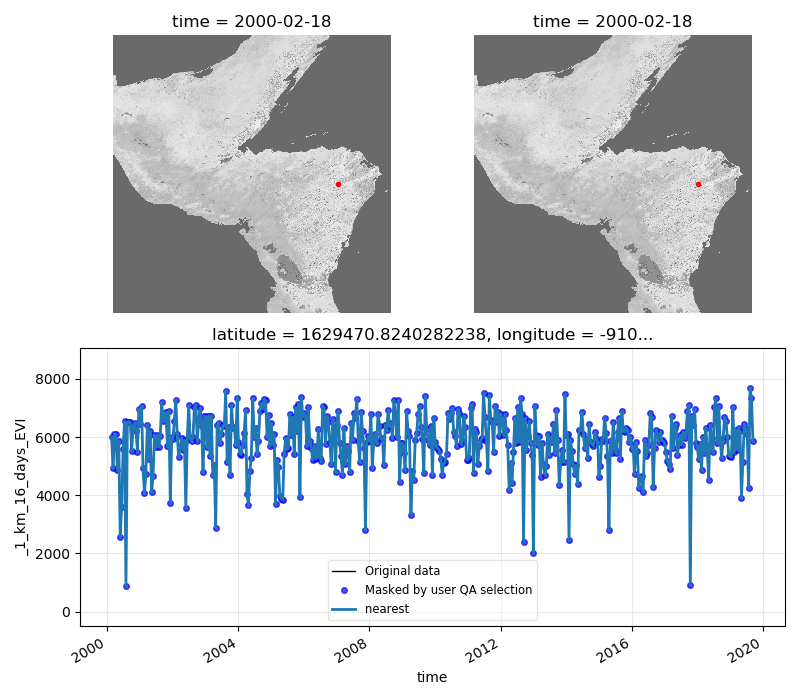

In [9]:
# Create the QA analytics object -- only for plotting purposes!
qa_analytics = Analytics(source_dir=DataDir, product=product, version=version, chunked=True)

# Time series analysis
tsa = TimeSeriesInterpolation(qa_analytics)

## Create on-the-fly composites

In [ ]:
tsa.fig.get_size_inches()

In [ ]:
# Monthly composite - 1MS - one month at the start of the month
monthly_mean_EVI = ts.data._1_km_16_days_EVI.resample(time='1MS').max('time')

In [ ]:
# What's in the monthly composite
monthly_mean_EVI

In [ ]:
import matplotlib.pyplot as plt

# Some help on how to access dimension on an xarray
# http://xarray.pydata.org/en/stable/indexing.html

# Plot January composite
p = monthly_mean_EVI.sel(time='2018-10-01').plot(cmap='Greys_r')
# Keep square aspect
p.axes.set_aspect('equal')
# Show plot
plt.show()

In [ ]:
# Create a 3-month composite
three_month_mean_EVI = ts.data._1_km_16_days_EVI.resample(time='3MS').mean('time')

In [ ]:
three_month_mean_EVI.time

In [ ]:
# Some help on how to access dimension on an xarray
# http://xarray.pydata.org/en/stable/indexing.html

# Plot January composite
p = three_month_mean_EVI.sel(time='2018-04-01').plot(cmap='Greys_r')
# Keep square aspect
p.axes.set_aspect('equal')
# Show plot
plt.show()

In [ ]:
# Synthetic daily EVI -- D is day
daily_EVI = ts.data._1_km_16_days_EVI.resample(time='D').ffill()

In [ ]:
daily_EVI

In [ ]:
# Plot a single pixel
# Original data
ts.data._1_km_16_days_EVI[:,600,600].plot(label='Original data')
# "Daily" data
daily_EVI[:,600,600].plot(label='Synthetic daily data')
plt.legend()
plt.show()

## EX4 Create a 10-day composite of NIR reflectance
 * Hint -- have a look to cell 16
 * Additionally, check the help of the pandas dataframe resample method
   * ```ts.data._1_km_16_days_EVI.resample?```